In [4]:
!python --version

Python 3.12.7


In [6]:
pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 3.9/376.0 MB 23.5 MB/s eta 0:00:16
    --------------------------------------- 7.6/376.0 MB 18.1 MB/s eta 0:00:21
   - -------------------------------------- 11.3/376.0 MB 17.6 MB/s eta 0:00:21
   - -------------------------------------- 14.9/376.0 MB 18.1 MB/s eta 0:00:20
   -- ------------------------------------- 19.1/376.0 MB 18.3 MB/s eta 0:00:20
   -- ------------------------------------- 22.0/376.0 MB 17.6 MB/s eta 0:00:21
   -- ------------------------------------- 24.9/376.0 MB 17.0 MB/s eta 0:00:21
   -- ------------------------------------- 27.3/376.0 MB 16.5 MB/s eta 0:00:22
   --- ------------------------------------ 29.6/376.0 MB 15.8 MB/s eta 0:00:22
   --- ------------------------------------ 32.2/376.0 MB 15.4 MB/s eta 0:00:23
   --- ------------------------------------ 34.9/376.0 MB 15.3 MB/s eta 0:00:23
   --- ------------------------------------ 37.2/3

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load and Preprocess the Iris Dataset

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

## Normalize the features

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(150, 4)

## Convert labels to one-hot encoding

In [11]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

## Train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build the ANN Model

In [13]:
model = Sequential()

## Input Layer + First Hidden Layer

In [14]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10, activation='relu'))

## Second Hidden Layer

In [15]:
model.add(Dense(8, activation='relu'))

## Output Layer (3 neurons for 3 classes)

In [16]:
model.add(Dense(3, activation='softmax'))

## Compile the Model

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    verbose=1,
    validation_split=0.1  # optional: monitor performance on 10% of training data
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1360 - loss: 1.2858 - val_accuracy: 0.1667 - val_loss: 1.0994
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2289 - loss: 1.1511 - val_accuracy: 0.1667 - val_loss: 1.0768
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1324 - loss: 1.1637 - val_accuracy: 0.2500 - val_loss: 1.0562
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1941 - loss: 1.0992 - val_accuracy: 0.2500 - val_loss: 1.0372
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1970 - loss: 1.0734 - val_accuracy: 0.3333 - val_loss: 1.0179
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2125 - loss: 1.0440 - val_accuracy: 0.4167 - val_loss: 0.9996
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2417 - loss: 1.0253 - val_accuracy: 0.4167 - val_loss: 0.9823
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3218 - loss: 0.9981 - val_accuracy: 0.4167 - 

## Evaluate the Model

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0557
Test Accuracy: 1.00


## Make Predictions

In [20]:
# Get probabilities
pred_prob = model.predict(X_test)

# Convert to class labels
pred_labels = np.argmax(pred_prob, axis=1)
true_labels = np.argmax(y_test, axis=1)

print("Predicted Labels:", pred_labels)
print("True Labels     :", true_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
True Labels     : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [21]:
!pip install matplotlib

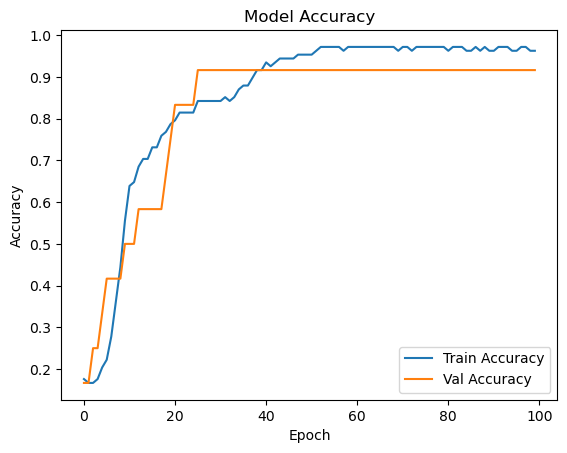

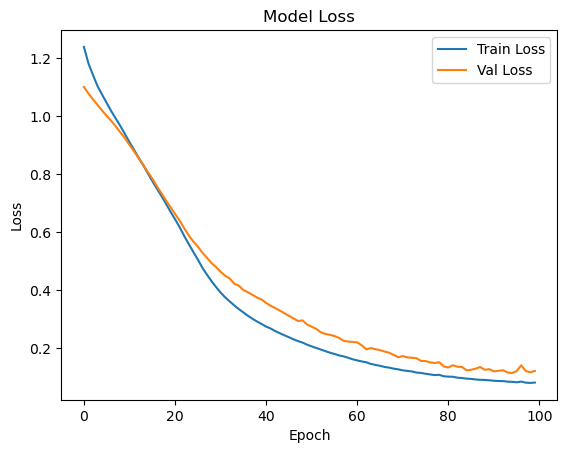

In [23]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

## Save the entire model (architecture + weights + optimizer)

In [24]:
model.save("my_model.keras") 

## To Load the Saved Model Later

In [25]:
from tensorflow.keras.models import load_model

model = load_model("my_model.keras")

In [26]:
predictions = model.predict(X_test)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[7.34943198e-04 9.52432871e-01 4.68321480e-02]
 [9.99597728e-01 3.47498019e-04 5.48409553e-05]
 [3.27928060e-13 8.30809004e-05 9.99916911e-01]
 [9.97439143e-04 8.73940706e-01 1.25061840e-01]
 [2.34058840e-04 8.97839785e-01 1.01926178e-01]
 [9.98569012e-01 1.24400260e-03 1.86953344e-04]
 [5.38530648e-02 9.24087942e-01 2.20590346e-02]
 [1.27074054e-06 3.03745605e-02 9.69624102e-01]
 [4.82434507e-06 6.78683162e-01 3.21312040e-01]
 [7.30605191e-03 9.77388859e-01 1.53050963e-02]
 [3.25883884e-05 1.51356354e-01 8.48611116e-01]
 [9.98955131e-01 9.79238888e-04 6.55606273e-05]
 [9.99524117e-01 4.04738123e-04 7.11246830e-05]
 [9.99100924e-01 8.35181680e-04 6.39922873e-05]
 [9.99787152e-01 1.70586209e-04 4.22711964e-05]
 [5.14087966e-03 8.86699319e-01 1.08159885e-01]
 [2.01290771e-08 4.65906644e-03 9.95340943e-01]
 [1.98524655e-03 9.87982392e-01 1.00323223e-02]
 [1.07107975e-03 9.35939014e-01 6.29899204e-02]
 [9.57025659e-09 4.90194140e-03 9.95098054e-01]
 [

In [27]:
for i, val_acc in enumerate(history.history['val_accuracy']):
    print(f"Epoch {i+1}: {val_acc:.4f}")


Epoch 1: 0.1667
Epoch 2: 0.1667
Epoch 3: 0.2500
Epoch 4: 0.2500
Epoch 5: 0.3333
Epoch 6: 0.4167
Epoch 7: 0.4167
Epoch 8: 0.4167
Epoch 9: 0.4167
Epoch 10: 0.5000
Epoch 11: 0.5000
Epoch 12: 0.5000
Epoch 13: 0.5833
Epoch 14: 0.5833
Epoch 15: 0.5833
Epoch 16: 0.5833
Epoch 17: 0.5833
Epoch 18: 0.5833
Epoch 19: 0.6667
Epoch 20: 0.7500
Epoch 21: 0.8333
Epoch 22: 0.8333
Epoch 23: 0.8333
Epoch 24: 0.8333
Epoch 25: 0.8333
Epoch 26: 0.9167
Epoch 27: 0.9167
Epoch 28: 0.9167
Epoch 29: 0.9167
Epoch 30: 0.9167
Epoch 31: 0.9167
Epoch 32: 0.9167
Epoch 33: 0.9167
Epoch 34: 0.9167
Epoch 35: 0.9167
Epoch 36: 0.9167
Epoch 37: 0.9167
Epoch 38: 0.9167
Epoch 39: 0.9167
Epoch 40: 0.9167
Epoch 41: 0.9167
Epoch 42: 0.9167
Epoch 43: 0.9167
Epoch 44: 0.9167
Epoch 45: 0.9167
Epoch 46: 0.9167
Epoch 47: 0.9167
Epoch 48: 0.9167
Epoch 49: 0.9167
Epoch 50: 0.9167
Epoch 51: 0.9167
Epoch 52: 0.9167
Epoch 53: 0.9167
Epoch 54: 0.9167
Epoch 55: 0.9167
Epoch 56: 0.9167
Epoch 57: 0.9167
Epoch 58: 0.9167
Epoch 59: 0.9167
Epoch 